In [256]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import numpy as np
import pandas as pd
import xlrd

In [257]:
def open_exl(address, idx):
    data = xlrd.open_workbook(address)
    table = data.sheets()[idx]
    rows = table.nrows
    ct_data = []
    for row in range(rows):
        ct_data.append(table.row_values(row))
    return np.array(ct_data)[:, :4]

def asfloat(data):
    new = np.zeros_like(data, dtype=np.float64)

    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            new[i, j] = my_float(data[i, j])

    return new

def my_float(x):
    try:
        return float(x)
    except:
        try:
            return float(x[:-1])           
        except:
            return float(x[:-2])

In [258]:
# load data from first 100 ranking in 5 servers
asia = open_exl('pubg_as.xls', 0)
eu = open_exl('pubg_eu.xls', 0)
na = open_exl('pubg_na.xls', 0)
oc = open_exl('pubg_oc.xls', 0)
sea = open_exl('pubg_sea.xls', 0)

# Load all data
all_data = np.genfromtxt('PUBG_Player_Statistics.csv', delimiter=',')
all_data[:, 28] = all_data[:, 28] * 100

# Train data
train_data = all_data[1:2000, :][:, [3, 2, 28, 9]]
test_data = all_data[2000:, :][:, [3, 2, 28, 9]]

In [259]:
data = np.vstack((asia[1:], eu[1:], na[1:], oc[1:], sea[1:], players_data[1:]))
df = pd.DataFrame({data[0, i]: data[1:, i] for i in range(data.shape[1])})
m = asfloat(data[1:, :4])

In [260]:
number_cluster = 6
kmeans = KMeans(n_clusters=number_cluster).fit(m)
labels = kmeans.labels_

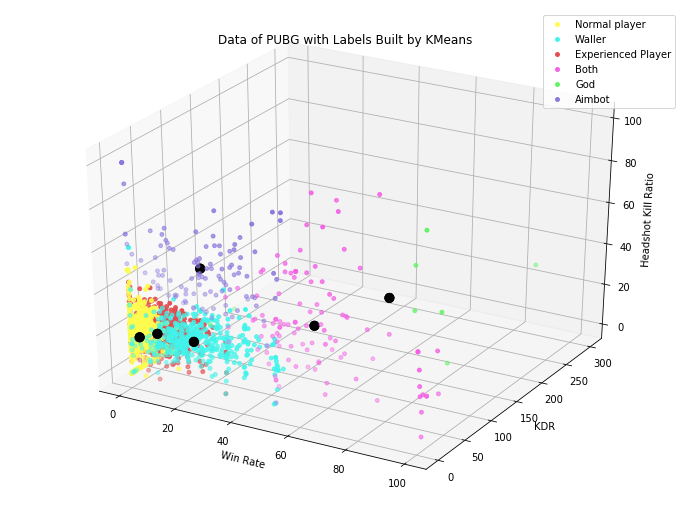

In [268]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colors = ['#fffc4f', '#41f4eb', '#E44B4E', '#F461E6', '#61F464', '#8D77DD', '#f49e42']
label_list = ['Normal player', 'Waller', 'Experienced Player', 'Both', 'God', 'Aimbot']
c_list = [colors[labels[i]] for i in range(m.shape[0])]
center = kmeans.cluster_centers_

plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = m[labels == i]
    x,y,z = c[:,0],c[:,1],c[:,2]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 2]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Headshot Kill Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Rate')
plt.show()

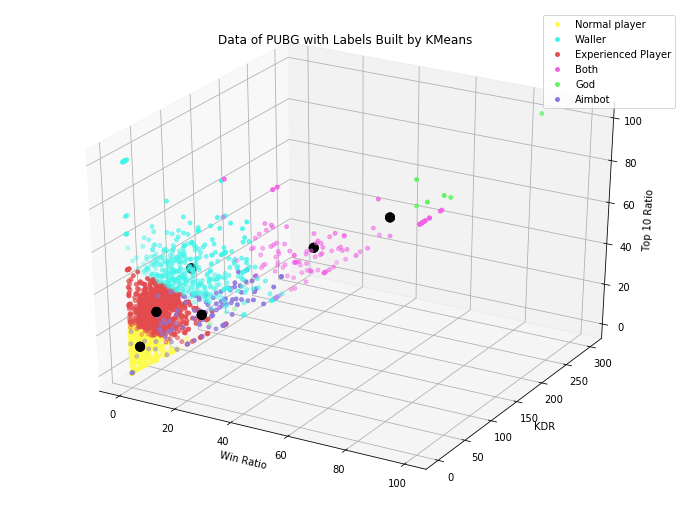

In [269]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = m[labels == i]
    x,y,z = c[:,0],c[:,1],c[:,3]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 3]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Top 10 Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Ratio')
plt.show()

In [270]:
predict_labels = kmeans.predict(test_data)

In [271]:
print(np.bincount(predict_labels))

print("Win Rate, KDR, Headshot, Top 10")
for row in test_data[predict_labels == 1]:
    print(row)

[59352  3883 20398   896     1  1369]
Win Rate, KDR, Headshot, Top 10
[ 21.43   4.18   9.    42.9 ]
[  9.76   2.11  13.    48.8 ]
[ 50.   6.   0.  50.]
[ 50.  15.  20.  50.]
[ 20.     1.75  29.    60.  ]
[  0.     2.15  21.    69.2 ]
[ 16.67   6.4   22.    83.3 ]
[  0.     4.33  28.    55.6 ]
[ 22.22   3.43  29.    55.6 ]
[ 15.38   2.77  23.    59.6 ]
[  6.25   2.2   12.    50.  ]
[ 14.29   3.25  10.    50.  ]
[ 23.08   3.    20.    61.5 ]
[ 25.   5.  13.  75.]
[ 11.11   4.06  22.    50.  ]
[ 12.    1.7  14.   56. ]
[ 15.     4.59  23.    55.  ]
[ 22.22   2.29  19.    44.4 ]
[  0.    4.2  19.   60. ]
[ 50.   7.  14.  50.]
[ 20.    4.5  17.   60. ]
[ 14.29   3.33  20.    85.7 ]
[ 28.57   4.8   17.    42.9 ]
[ 21.05   5.93  27.    42.1 ]
[ 14.08   2.62  19.    51.4 ]
[ 15.38   2.95  15.    46.2 ]
[  14.29    6.83   22.    100.  ]
[   0.    1.    0.  100.]
[ 33.33   5.5   18.    66.7 ]
[ 16.67   4.2   10.    50.  ]
[ 26.23   4.93  18.    41.  ]
[  9.41   1.73  12.    51.2 ]
[ 20.     5.25

[ 16.67   5.4   26.    50.  ]
[ 13.33   2.21  24.    48.3 ]
[ 20.     4.03  24.    50.  ]
[ 33.33   8.94  19.    45.8 ]
[   0.    3.   67.  100.]
[   0.    5.   20.  100.]
[  0.    1.5  33.   75. ]
[ 25.     4.67  11.    62.5 ]
[ 15.38   3.91  30.    46.2 ]
[ 29.17   3.59  18.    66.7 ]
[ 12.5   3.   10.   62.5]
[  0.     3.67  18.    66.7 ]
[ 14.29   2.25   7.    57.1 ]
[  0.    3.   18.   61.5]
[ 50.   5.   0.  50.]
[ 33.33   5.83  26.    44.4 ]
[ 12.38   2.82  19.    47.6 ]
[ 27.27   4.53  23.    65.9 ]
[ 18.18   5.19  26.    51.5 ]
[ 16.67   4.    32.    44.4 ]
[ 50.   7.  14.  50.]
[ 11.54   2.91  18.    53.8 ]
[ 29.41   5.33  27.    58.8 ]
[ 26.32   6.71  19.    42.1 ]
[ 10.84   2.64  18.    48.2 ]
[ 27.78   3.62  17.    61.1 ]
[ 33.33   9.5   16.    66.7 ]
[   0.    5.    0.  100.]
[  0.    1.4  14.   60. ]
[ 30.     5.64  30.    55.  ]
[ 50.    9.5   0.   75. ]
[ 20.     3.44  22.    45.  ]
[ 11.11   2.49  22.    55.6 ]
[ 33.33   5.67  18.    55.6 ]
[ 10.53   2.53   5.    47.4 

[ 30.     2.29  12.    70.  ]
[ 25.     6.11  38.    58.3 ]
[  0.    1.3  31.   60. ]
[   0.    4.   50.  100.]
[ 16.67   4.9   27.    75.  ]
[ 40.     3.67   9.    60.  ]
[   0.    8.   25.  100.]
[  9.09   4.6   24.    63.6 ]
[  0.    4.5  19.   83.3]
[ 36.36   8.43  20.    45.5 ]
[ 25.     2.67  38.    75.  ]
[   0.    3.    0.  100.]
[  0.     2.83   6.    58.3 ]
[ 18.75   2.62  32.    62.5 ]
[ 50.   6.  17.  50.]
[  7.14   2.31  37.    64.3 ]
[ 14.29   1.92   9.    64.3 ]
[   0.    9.   33.  100.]
[ 12.5   2.   29.   50. ]
[ 28.57   6.6   12.    57.1 ]
[ 14.29   3.83  17.    57.1 ]
[  7.14   3.23  31.    50.  ]
[ 24.24   2.96  12.    60.6 ]
[ 25.     4.67  21.    50.  ]
[ 50.   3.   0.  50.]
[ 40.   4.   0.  60.]
[ 33.33   6.    28.    58.3 ]
[ 17.65   3.61  13.    52.9 ]
[ 16.67   3.8   32.    50.  ]
[ 25.    5.   22.   58.3]
[ 50.  18.  11.  50.]
[ 50.   3.   0.  50.]
[ 40.   5.  20.  80.]
[ 30.     9.86  32.    50.  ]
[ 21.43   3.09  21.    46.4 ]
[ 14.29   4.67  21.    57.1 ]


[ 16.67   3.3   21.    50.  ]
[   0.    0.    0.  100.]
[ 50.   5.  20.  50.]
[   0.    2.   50.  100.]
[   0.      3.67   18.    100.  ]
[   0.    5.    0.  100.]
[ 20.     8.25  27.    60.  ]
[ 16.67   3.6   22.    83.3 ]
[ 18.18   3.78  32.    45.5 ]
[  0.     3.14  14.    57.1 ]
[ 10.     4.44  25.    50.  ]
[ 25.     3.67   0.    75.  ]
[  0.    5.    0.   66.7]
[ 25.   7.  24.  50.]
[ 33.33   7.75   3.    66.7 ]
[ 11.11   2.12  24.    55.6 ]
[   0.    8.   38.  100.]
[ 18.52   3.18  31.    48.1 ]
[ 50.   9.  22.  50.]
[  0.    2.6  23.   60. ]
[   0.    4.   50.  100.]
[ 11.76   5.33  20.    70.6 ]
[  0.     3.25  31.    75.  ]
[ 22.22   3.71  27.    77.8 ]
[ 22.22   3.07  23.    61.1 ]
[ 50.    7.5  13.   50. ]
[ 16.67   3.6   22.    83.3 ]
[   0.    2.    0.  100.]
[ 33.33   3.    17.    66.7 ]
[   0.    2.   50.  100.]
[ 11.11   5.38  26.    50.  ]
[ 11.11   3.25  15.    55.6 ]
[  0.     7.67  30.    66.7 ]
[ 11.76   2.8   19.    47.1 ]
[  7.14   3.23  33.    57.1 ]
[ 22.22   

[  0.     4.67  21.    66.7 ]
[   0.    7.   43.  100.]
[  0.   5.  12.  60.]
[ 10.     3.22  10.    50.  ]
[ 50.   3.   0.  50.]
[ 16.67   3.    13.    50.  ]
[   0.    4.   50.  100.]
[  0.    6.6  30.   80. ]
[ 33.33   4.5   33.    66.7 ]
[   0.    4.   25.  100.]
[ 16.67   2.6    0.    50.  ]
[ 12.5   3.   33.   62.5]
[ 50.  12.  17.  50.]
[ 12.5    2.14  17.    50.  ]
[ 16.67   4.8   17.    66.7 ]
[ 21.43   2.27  16.    42.9 ]
[ 16.67   5.2   31.    66.7 ]
[ 50.   5.   0.  50.]
[ 33.33   3.5   29.    66.7 ]
[   0.    3.    0.  100.]
[ 50.   6.  33.  50.]
[  6.67   1.64  26.    60.  ]
[ 33.33   2.5   40.    66.7 ]
[  0.     3.33  20.    66.7 ]
[ 10.34   2.65  14.    48.3 ]
[ 16.67   4.2   38.    50.  ]
[ 50.   6.  33.  50.]
[ 21.05   5.87  28.    42.1 ]
[  8.33   3.55  10.    66.7 ]
[ 19.05   3.18  26.    47.6 ]
[ 16.67   3.8   11.    50.  ]
[ 25.     2.33   5.    41.7 ]
[ 30.     2.57  11.    50.  ]
[ 27.27   5.12  37.    45.5 ]
[ 50.   4.   0.  50.]
[  0.    3.6  28.   60. ]
[   

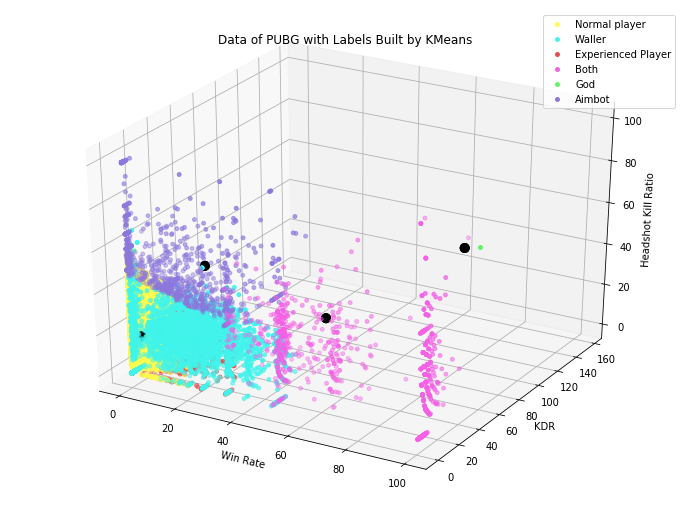

In [272]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = test_data[predict_labels == i]
    x,y,z = c[:,0],c[:,1],c[:,2]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 2]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Headshot Kill Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Rate')
plt.show()

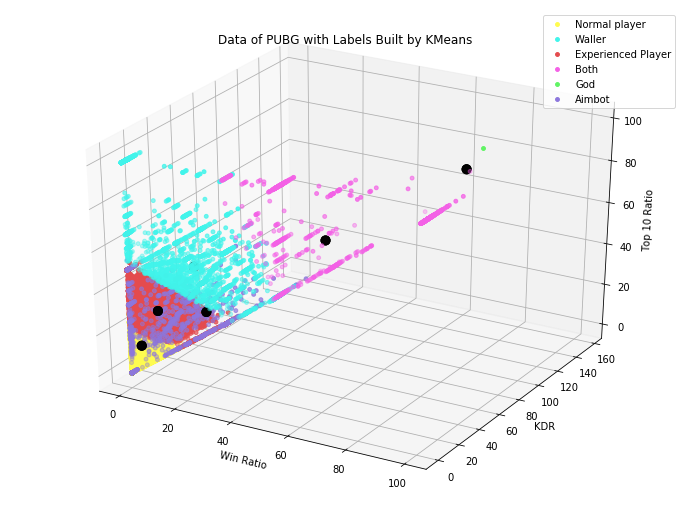

In [273]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = test_data[predict_labels == i]
    x,y,z = c[:,0],c[:,1],c[:,3]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 3]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Top 10 Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Ratio')
plt.show()